In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Height-WeightData.csv')

In [2]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [4]:
df['Height'].head()


0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [5]:
df['Weight'].head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [6]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [7]:
df['Weight'].mean()

186.89125797946284

In [8]:
df['Height'].mean()

69.02441087268797

In [9]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [10]:
df.shape

(3501, 2)

In [11]:
row, col = df.shape

In [12]:
row

3501

In [13]:
col


2

In [14]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

Text(0.5, 1.0, 'Height vs Weight plot')

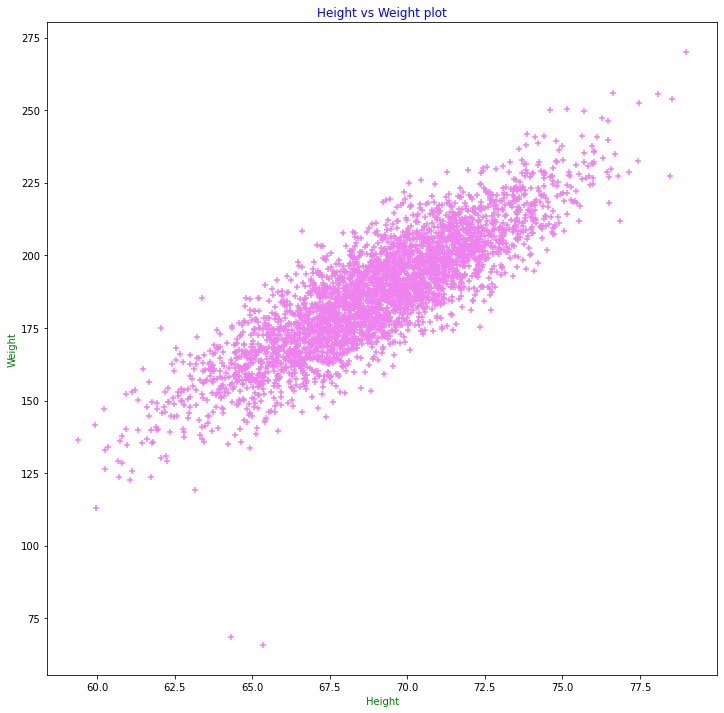

In [15]:
#visualization
plt.figure(figsize = (12,12))
plt.scatter(df.Height, df.Weight, marker = '+', color = 'violet')
plt.xlabel('Height', color = 'green')
plt.ylabel('Weight', color = 'green')
plt.title('Height vs Weight plot', color = 'blue')

In [16]:
x = df[['Height']]

In [17]:
y = df['Weight']

In [18]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [19]:
from sklearn.model_selection import train_test_split as tts

xtrain, xtest, ytrain, ytext = tts(x,y,test_size = .30)

In [20]:
xtrain.head()

,Height
1487,73.279445
1376,65.102052
548,67.462991
3077,70.639451
2072,65.438043


In [21]:
ytrain.head()

1487    209.228854
1376    156.658460
548     182.301286
3077    210.798263
2072    178.446423
Name: Weight, dtype: float64

In [22]:
#Linear regression

from sklearn.linear_model import LinearRegression


In [23]:
reg = LinearRegression().fit(xtrain, ytrain)

In [24]:
reg.score(xtrain, ytrain)

0.7311426665703242

In [25]:
reg.coef_

array([5.97571496])

In [26]:
reg.intercept_

-225.50947788162966

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
reg.predict([[70.920145]])

array([198.28909324])

In [29]:
predct = reg.predict(xtest)

In [30]:
predct

array([191.63301738, 201.26978577, 188.91703647, ..., 213.05414109,
       193.16163789, 195.28893917])

In [31]:
df['predicted_result'] = reg.predict(x)

In [32]:
df.head()

,Height,Weight,predicted_result
0,73.847017,241.893563,215.779246
1,68.781904,162.310473,185.511575
2,74.110105,212.740856,217.351387
3,71.730978,220.042470,203.134403
4,69.881796,206.349801,192.084215


In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse= mean_squared_error(ytext,predct)

In [34]:
mse

100.21160272294306

In [35]:
 r2 = r2_score(ytext, predct)

In [36]:
r2

0.735310924987912

In [37]:
mae= mean_absolute_error(ytext, predct)

In [38]:
mae

7.975478008027932

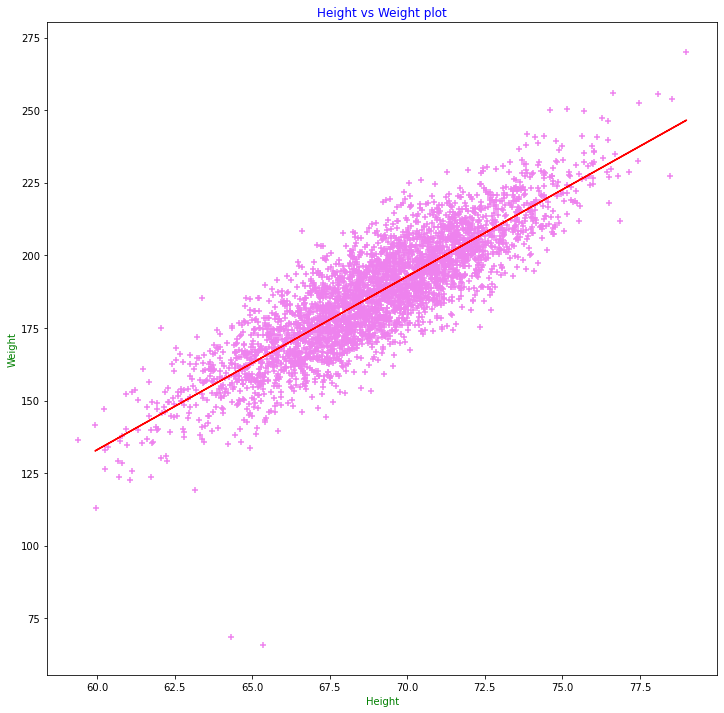

In [39]:
#Best fit line

plt.figure(figsize = (12,12))
plt.scatter(df.Height, df.Weight, marker = '+', color = 'violet')
plt.xlabel('Height', color = 'green')
plt.ylabel('Weight', color = 'green')
plt.title('Height vs Weight plot', color = 'blue')
plt.plot(xtrain.squeeze(), reg.predict(xtrain), color='red')